### Taylor Series

A **Taylor Series** is a representation of a function as an infinite sum of terms that are calculated from the values of the function's derivatives at a single point.

The Taylor series of a real or complex-valued function $f(x)$ that is infinitely differentiable at a real or complex number $a$ is the power series,

\begin{align} 
&f(a) + \frac{f'(a)}{1!}(x-a) + \frac{f''(a)}{2!}(x-a)^2 + \frac{f'''(a)}{3!}(x-a)^3 + \cdots \\
&= \sum_{n=0}^{\infty}\frac{f^{n}(a)}{n!} (x-a)^n
\end{align}

When $a=0$, the series is also called a [Maclaurin series](http://mathworld.wolfram.com/MaclaurinSeries.html)

[YouTube Tutorial](https://www.youtube.com/watch?v=3d6DsjIBzJ4)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
plt.style.use('ggplot')

In [2]:
def factorial(n):
    if n <= 0:
        return 1
    else:
        return n * factorial(n-1)

def Taylor(function, x0, n, x=sy.Symbol('x')):
    i = 0
    p = 0
    while i <= n:
        p += (function.diff(x, i).subs(x, x0)) / factorial(i) * (x - x0)**i
        i += 1
    return p

In [3]:
def plot(ax, f, x0=0,n0=1, n=5, by=2, x_lims = [-10, 10], y_lims = [-10, 10], 
         npoints=800, x=sy.Symbol('x'), func_name=None):
    x1 = np.linspace(x_lims[0], x_lims[1], npoints)
    for j in range(n0, n+1, by):
        func = Taylor(f, x0, j)
        taylor_lambda = sy.lambdify(x, func, 'numpy')
        ax.plot(x1, taylor_lambda(x1), label = 'Order '+str(j))
    func_lambda = sy.lambdify(x, f, 'numpy')
    ax.plot(x1, func_lambda(x1), label=func_name)
    #
    ax.set_xlim(x_lims)
    ax.set_ylim(y_lims)
    ax.legend()
    plt.grid(True)
    plt.show()

### Example 01: Exponential Function
Maclaurin series,

$$
e^x = \sum_{n!}^{\infty} \frac{x^n}{n!} = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots
$$

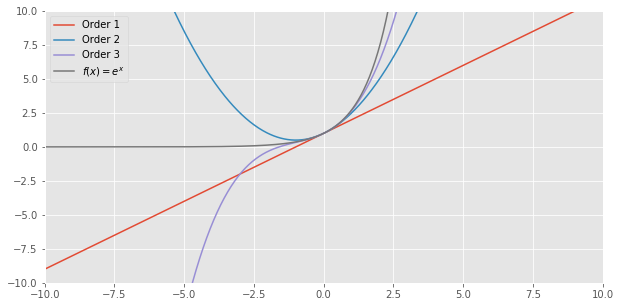

In [4]:
from sympy.functions import exp
x = sy.Symbol('x')
f = exp(x)
fig, ax = plt.subplots(figsize=(10,5))
plot(ax=ax, f=f, n=3, by=1, func_name = r'$f(x)=e^x$')

### Example 02: Natural Logarithm
The natural logarithm (with base e) has Maclaurin serise

$$
\log(1+x) = \sum_{n=1}^{\infty} (-1)^{n+1} \frac{x^N}{n} = x - \frac{x^2}{2} + \frac{x^3}{3} - \cdots
$$

/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in log
  """


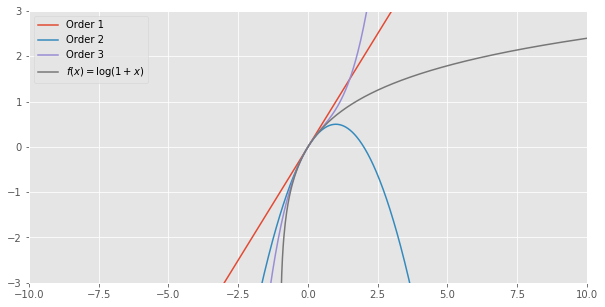

In [5]:
from sympy.functions import ln
x = sy.Symbol('x')
f = ln(1+x)
fig, ax = plt.subplots(figsize=(10, 5))
plot(ax=ax, f=f, n=3, by=1, y_lims=[-3,3],func_name = r'$f(x)=\log(1+x)$')

### Example 03: Trigonometric functions

Sine function:

$$
\sin x = \sum_{n=0}^{\infty}\frac{(-1)^n}{(2n+1)!} x^{2n+1} = x - \frac{x^3}{6}+\frac{x^5}{120} - \cdots
$$

Cosine function:

$$
\cos x = \sum_{n=0}^{\infty}\frac{(-1)^n}{(2n)!} x^{2n} = 1 - \frac{x^2}{2}+\frac{x^4}{24} - \cdots
$$


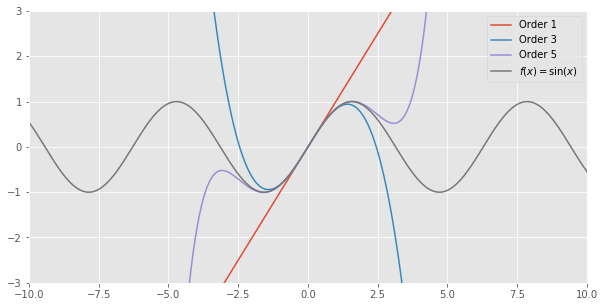

In [6]:
from sympy.functions import sin, cos
x = sy.Symbol('x')
f = sin(x)
fig, ax = plt.subplots(figsize=(10, 5))
plot(ax=ax, f=f, n=5, by=2, y_lims=[-3,3],func_name = r'$f(x)=\sin(x)$')

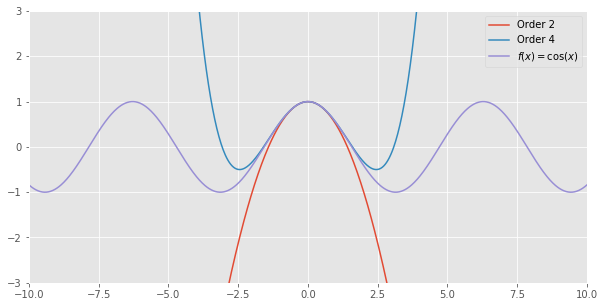

In [7]:
x = sy.Symbol('x')
f = cos(x)
fig, ax = plt.subplots(figsize=(10, 5))
plot(ax=ax, f=f, n0=2, n=5, by=2, y_lims=[-3,3],func_name = r'$f(x)=\cos(x)$')

### Example 04: KL Divergence
[source](http://boris-belousov.net/2016/10/16/fisher-vs-KL/)

Let $P$ and $Q$ be probability measures over a set $X$, and let $P$ be absolutely continuous with respect to $Q$. If $\mu$ is any measure on $X$ for which $p=\frac{dP}{d\mu}$ and $q=\frac{dQ}{d\mu}$ exist, then the [Kullback-Leibler divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) from $Q$ and $P$ is given as 
$$
\begin{align}
D_{KL}(P||Q) &=& \int_X \log(\frac{dP}{dQ})dP \\
&=& \int_X p \log{\frac{p}{q}}d\mu
\end{align}
$$

Let the density $q=q(x, \theta)$ be parameterized by a vector $\theta$ and let $p$ be a variantion of $q$, i.e., $p=q + \delta q$ where $\delta q=\frac{\delta q}{\delta \theta_m}\delta \theta_m$. Then

$$
\begin{align}
D_{KL}(P||Q) &&=& \int_X p \log{\frac{p}{q}}d\mu = \int_X (q + \delta q) \log{\frac{q + \delta q}{q}}d\mu \\
&&=& \int_X q \log{(1+\frac{\delta q}{q})} d\mu + \int_X \delta q \log{(1+\frac{\delta q}{q})}d\mu \\
&&\approx& \int_X q(\frac{\delta q}{q} - \frac{(\delta q)^2}{2q^2}) d\mu + \int_X \delta q \frac{\delta q}{q} d\mu \quad \text{Taylor series for log} \\
&&=& \int_X \delta q d\mu + \frac{1}{2} \int_X q \frac{(\delta q)^2}{q^2} d \mu \\
&&=& \delta \theta_m \frac{\partial }{\partial \theta_m} \int_X qd\mu + \frac{1}{2}\delta \theta_k \theta_j
\int_X q (\frac{1}{q}\frac{\partial q}{\partial \theta_k}) (\frac{1}{q}\frac{\partial q}{\partial \theta_j}) d \mu \\
&&=& 0 + \frac{1}{2}\delta \theta_k \theta_j E\{\frac{\partial \log{q}}{\partial \theta_k} \frac{\partial \log{q}}{\partial \theta_j}\} \\
&&=& \frac{1}{2} \delta \theta_k \delta \theta_j g_{jk}(\theta)
\end{align}
$$

where we recognize $g_{jk}$, the [Fisher information metric](https://en.wikipedia.org/wiki/Fisher_information_metric), 

$$
g_{jk}(\theta) = E \{ \frac{\partial \log q}{\partial \theta_k} \frac{\partial \log q}{\partial \theta_j}\}
$$

Thus, the Fisher information metric is the second derivative of the Kullback-Leibler divergence,

$$
g_{jk}(\theta_0) = \frac{\partial^2}{\partial \theta_k \partial \theta_j} \Bigr|_{\substack{\theta=\theta_0}} D_{KL}(Q(\theta) || Q(\theta_0))
$$


### Example 06 f-divergence 

For discrete distributions $p$ and $q$, the [f-divergence](https://en.wikipedia.org/wiki/F-divergence) is defined as

$$
D_f(p||q) = \sum_i q_i f(\frac{p_i}{q_i})
$$

where $f$ is a convex function $f: (0, \infty) \rightarrow \mathbb{R}$ satisfying the condition $f(1)=0$. if $p$ is a variation of $q$, then

$$
D_f(q+dq \| q) = \sum_i q_i f(\frac{q+dq_i}{q_i}) = \sum_i q_i f(1+\frac{dq_i}{q_i})
$$

Provided $f$ is twice differentiable, we can develop it into Taylor series

$$
\begin{align}
f(x) = f(1+\frac{dq_i}{q_i}) &\approx&& f(1) + f'(1) (x-1) + \frac{1}{2}f''(1)(\frac{dq_i}{q_i})^2  \\
&=&& f(1) + f'(1)(1+\frac{dq_i}{q_i} - 1) +  \frac{1}{2}f''(1)(1+\frac{dq_i}{q_i} - 1)^2 \\
&=&& f(1) + f'(1)\frac{dq_i}{q_i} +  \frac{1}{2}f''(1)(\frac{dq_i}{q_i})^2 \\
&=&& 0 + 0\frac{dq_i}{q_i} + \frac{1}{2}f''(1)(\frac{dq_i}{q_i})^2 \\
&=&&  \frac{1}{2}f''(1)(\frac{dq_i}{q_i})^2 \\
\end{align}
$$

And thus approximate the f-divergence by a quadratic function

$$
\begin{align}
D_f(q+dq || q) &&\approx& \sum_i q_i \frac{1}{2}f''(1) (\frac{dq_i}{q_i})^2 \\
&&=& \frac{1}{2}f''(1)\sum_i dq_i \frac{1}{q_i} dq_i 
\end{align}
$$

For continuous case,

$$
\begin{align}
D_f(q+dq || q) &&\approx& \int_X q_i \frac{1}{2}f''(1) (\frac{\delta q}{q})^2 d\mu \\
&&=& \frac{1}{2}f''(1)  \int_X q_i (\frac{\delta q}{q})^2 d\mu \\
&&=& \frac{1}{2}f''(1)  \delta \theta_k \delta \theta_j g_{jk}(\theta)
\end{align}
$$

where we recognize $g_{jk}$, the [Fisher information metric](https://en.wikipedia.org/wiki/Fisher_information_metric), 

$$
g_{jk}(\theta) = E \{ \frac{\partial \log q}{\partial \theta_k} \frac{\partial \log q}{\partial \theta_j}\}
$$
